<a href="https://colab.research.google.com/github/chris-kehl/tensorflow_linear_classifier/blob/main/tensorflow_linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  One of my first deep learning assignments at the University of Louisville while studying deep learning was to implement a linear classification model to seperate two classes.  We didn't cover the topic as of yet, or at least I didn't recall. So, I was struggling looking for any material that I could find on stackoverflow.  Thankfully Francosis Chollet has added this material and the solution in chapter 3 Deep Learning with Python 2nd addition.

  I would expect that if I was to go to a machine learning job interview that my potential employer would ask me to demonstrate how to solve this problem, or at least a simular problem on a white board. What a nightmare that would be.  I have never had to do an interview as of yet on a whiteboard, so this little tutorial will be a great tool to study and implement in my head prior to any interview, I'd hate to get caught off guard. Truely, the simple little things like linearly dividing classifiers are not my favorite things to do.  Who cares if you just developed a time-series model that saved the company millions, just do this classification task and the job is yours. 

The first task to this solution is to develop some some synthetic data. Your potential employer may provide you with a dataset, but if not you'll know how to build a synthetic one. I feel that if you can implement your own data, then you are in charge of the outcome.  If they give you data, hopefully you can comprehend what they want and can implement this tutorial into their dataset. (Chollet, 2021)

In [11]:
# before we start lets import all of our tools we will be using.

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [6]:
# implement synthetic data with tensorflow 
# Here we are implementing two point clouds with the same shape, but in different locations.

num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5], [0.5, 1]],
    size=num_samples_per_class)

  In the code above we just generated the first set of points which are 1000 2D points that will appear like an oval cloud that starts at the bottom left to the top right of the plot. The second set of points begin in the oposite direction. Next we are going to stack the samples into an array with a shape of (2000, 2)(Chollet, 2021)

In [9]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

The next process is to create our labels. When working with deep learning we have our information known as the data. We must have the data labeled in order for our models to figure out what it is. In this part. of our code we will generate target labels that are of an array of zeros and ones of shape (2000, 1) where targets[i, 0]. Are inputs i belong to the class 0 if inputs are i, and the opposite for the other class. (Chollet, 2021)




In [10]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

We will use matplotlib to view the plot of our data. Here we can see what the data points we just created look like. We will have two cloud points (point clouds), which they tell me are great for analyzing liDar images.

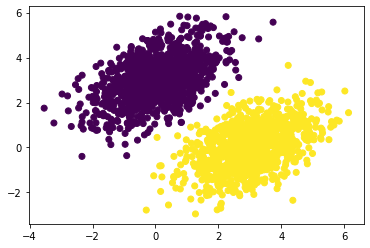

In [12]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

WOW!  We did it!!!

Our next step is to create a linear classification that will learn to seperate these two point clouds that represent two BLOBS, great movie.

We will train our model to minimize the square of the difference between the predictions and the target. (predictions = W * input + b) W is for the randomly assigned weights that occur at the beginning of our predictions, inputs are the inputs, as we coded three cells ago, and b is the bias that added to our predictions. (Chollet, 2021)

The next cell creates the weights and bias








In [16]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

The inputs will be of two demensional points such as we pointed out in input_dim = 2. The output_dim (output predictions) will be a single score per sample ran thru our model. The predictions will be 0 if the sample is close to 0 and 1 if the prediction is close to 1.

Now that we have our weights and bias figured out, we need to make the forward pass thru our models. 
the term matmul is a matrix multiplication https://en.wikipedia.org/wiki/Matrix_multiplication

In [19]:
def model(inputs):
    return tf.matmul(inputs, W) + b

Our classifier that we are building operates on 2D inputs, therefore W (our weights) are just two scalar coefficients. We have w1 and w2, so our W is just [[w1], [w2]]. Our b (bias) is just a single scalar coefficiant for our given inputs [x,y]. Our prediction value is prediction = [[w1], [w2]] * [x,y] + b = w1 * x + w2 * y + b. (Chollet, 2021)
If your looking for more information go here https://en.wikipedia.org/wiki/Dot_product

In [23]:
# define our loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

Our loss function as described in the code above is the mean square error of the targets minus the predictions. Reduce mean as in tf.reduce_mean is the average of per_sample loss scores in a single scalar loss value. Thus far in our model we have programmed our forward pass with our weights and bias being calculated thru the matrix multiplication. We have our outputs and we need to calculate the predictions to see how close we are to the targets. This is our loss function which is described in the code snippet above. Here as stated we are using the mean square error to calculate the loss. Now we need to use this loss function to adjust the weights. The next code block we define the training step function which will take our forward pass, calculate the loss, retrieve the gradient of the loss in regards to the weights, update the weights and send back thru the model, then we calculate our loss again. (Chollet, 2021)

In [24]:
from tensorflow.python.ops.custom_gradient import grad_pass_through
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

You can see that we are using our forward pass with the weights and bias, making a prediction, comparing the predictions with the target values, calculating the loss, and using the gradiant to adjust the weights.

We create our training batch. You can send your data thru your model in batches such as what is called a mini-batch.  When we do image recognition tasks with tensorflow, it is often that we see a mini-batch size of 128 go thru our model at once. Using batches instead of data instead of single data elements at a time speeds up the training cycle. However, you must take into acount the affect this will have on the accuracy of the model. In this case we are not going to use mini-batches, we will end all 2000 samples at once thru the model at once. (Chollet, 2021)

In [25]:
for step in range (40):
    loss = training_step(inputs, targets)
    print(f"loss at step {step}: {loss:.4f}")

loss at step 0: 1.7206
loss at step 1: 0.2380
loss at step 2: 0.1244
loss at step 3: 0.1021
loss at step 4: 0.0937
loss at step 5: 0.0877
loss at step 6: 0.0824
loss at step 7: 0.0777
loss at step 8: 0.0733
loss at step 9: 0.0693
loss at step 10: 0.0657
loss at step 11: 0.0623
loss at step 12: 0.0593
loss at step 13: 0.0565
loss at step 14: 0.0539
loss at step 15: 0.0515
loss at step 16: 0.0494
loss at step 17: 0.0474
loss at step 18: 0.0456
loss at step 19: 0.0440
loss at step 20: 0.0424
loss at step 21: 0.0411
loss at step 22: 0.0398
loss at step 23: 0.0386
loss at step 24: 0.0376
loss at step 25: 0.0366
loss at step 26: 0.0357
loss at step 27: 0.0349
loss at step 28: 0.0341
loss at step 29: 0.0334
loss at step 30: 0.0328
loss at step 31: 0.0322
loss at step 32: 0.0317
loss at step 33: 0.0312
loss at step 34: 0.0308
loss at step 35: 0.0304
loss at step 36: 0.0300
loss at step 37: 0.0297
loss at step 38: 0.0294
loss at step 39: 0.0291


If everything works out correctly we should have 40 epochs. With each epoch we can see that our loss decreases.

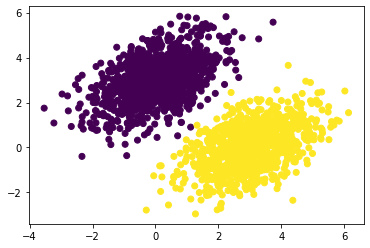

In [29]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

What we are looking at is our blobs separated by an invisible line, above the line is class 1, and below the line is our 0 class. This is generated by our predictions.

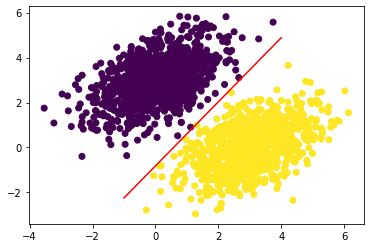

In [31]:
x = np.linspace(-1, 4, 100)
y = - W[0] / W[1] * x + (0.5 -b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:,0] > 0.5)

Here we add the line so that we can see how our classes are seperated.
x generates 100 evenly spaced numbers between -1 and 4. We look at our red line and can see that on the x axis the red line starts at -1 and extends up to 4 on the y axis. y is our line equasion y = - w1 / w2 * x + (0.5 - b) / w2. we use our matplotlib to plot x, y values seperated by a red line, hence the "r".

There we have it, what took me days to figure out while taking my deep learning class at the University of Louisville's Speed School of Engineering, Francosis Chollet has allowed me to do a tutorial in one morning.  I'm am greatfully thankful for this tutorial. This is a good refererance if your planning on going into an interview where you know a white board will be used.  I'm not for sure if you will need to memorize everything line by line. Hopefully, just the general concept of the deep learning model will be acceptable in some form of Pseudocode. (Chollet, 2021)

**Reference**

Chollet, Francois. Deep Learning with Python Second Edition. Manning Publications, 2021.